In [1]:
# load packages
import os
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import matplotlib.pyplot as plt

In [2]:
# set data and output folder
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [3]:
# define download function
def download(url):
    filename = os.path.join(data_folder, os.path.basename(url))
    if not os.path.exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

# download tiles
srtm_tiles = [
  'N27E086.hgt',
  'N27E087.hgt',
  'N28E086.hgt',
  'N28E087.hgt'
]

data_url = 'https://github.com/spatialthoughts/python-dataviz-web/releases/' \
  'download/srtm/'

for tile in srtm_tiles:
  url = '{}/{}'.format(data_url, tile)
  download(url)

Downloaded data/N27E086.hgt
Downloaded data/N27E087.hgt
Downloaded data/N28E086.hgt
Downloaded data/N28E087.hgt


In [4]:
# open single SRTM tile
filename = 'N28E087.hgt'
file_path = os.path.join(data_folder, filename)
rds = rxr.open_rasterio(file_path)

In [5]:
rds

<xarray.DataArray (band: 1, y: 3601, x: 3601)> Size: 26MB
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [6]:
# raster values
rds.values

array([[[5217, 5211, 5208, ..., 5097, 5098, 5089],
        [5206, 5201, 5200, ..., 5080, 5075, 5069],
        [5199, 5194, 5191, ..., 5063, 5055, 5048],
        ...,
        [5347, 5345, 5343, ..., 5747, 5750, 5757],
        [5338, 5338, 5336, ..., 5737, 5740, 5747],
        [5332, 5331, 5332, ..., 5734, 5736, 5744]]], dtype=int16)

In [7]:
# raster coords
rds.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0

In [8]:
# metadata
print('CRS:', rds.rio.crs)
print('Resolution:', rds.rio.resolution())
print('Bounds:', rds.rio.bounds())
print('Width:', rds.rio.width)
print('Height:', rds.rio.height)

CRS: EPSG:4326
Resolution: (0.0002777777777777778, -0.0002777777777777778)
Bounds: (86.99986111111112, 27.999861111111112, 88.00013888888888, 29.000138888888888)
Width: 3601
Height: 3601


In [13]:
# select a single band
band1 = rds.sel(band=1)
band1

<xarray.DataArray (y: 3601, x: 3601)> Size: 26MB
array([[5217, 5211, 5208, ..., 5097, 5098, 5089],
       [5206, 5201, 5200, ..., 5080, 5075, 5069],
       [5199, 5194, 5191, ..., 5063, 5055, 5048],
       ...,
       [5347, 5345, 5343, ..., 5747, 5750, 5757],
       [5338, 5338, 5336, ..., 5737, 5740, 5747],
       [5332, 5331, 5332, ..., 5734, 5736, 5744]], dtype=int16)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [15]:
# plotting multiple rasters
# open each source file and store datasets in a list
datasets = []
for tile in srtm_tiles:
    path = os.path.join(data_folder, tile)
    rds = rxr.open_rasterio(path)
    band = rds.sel(band=1)
    datasets.append(band)

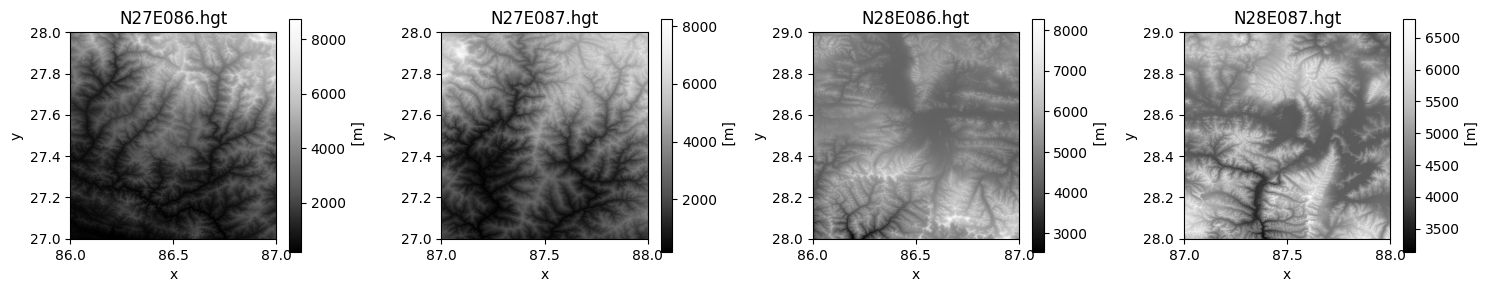

In [16]:
# plot the four rasters together
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(15,3)
for index, ax in enumerate(axes.flat):
    da = datasets[index]
    im = da.plot.imshow(ax=ax, cmap='Greys_r')
    filename = srtm_tiles[index]
    ax.set_title(filename)
    ax.set_aspect('equal') # maintain aspect ratio

plt.tight_layout()
plt.show()

In [17]:
# marge rasters
merged = merge_arrays(datasets, method='first')
merged

<xarray.DataArray (y: 7201, x: 7201)> Size: 104MB
array([[4916, 4926, 4931, ..., 5097, 5098, 5089],
       [4919, 4932, 4928, ..., 5080, 5075, 5069],
       [4919, 4928, 4935, ..., 5063, 5055, 5048],
       ...,
       [ 368,  368,  366, ..., 1905, 1919, 1937],
       [ 364,  364,  362, ..., 1913, 1930, 1944],
       [ 360,  359,  357, ..., 1918, 1930, 1942]], dtype=int16)
Coordinates:
  * x            (x) float64 58kB 86.0 86.0 86.0 86.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 58kB 29.0 29.0 29.0 29.0 ... 27.0 27.0 27.0 27.0
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [18]:
# check crs
merged.rio.crs

CRS.from_epsg(4326)

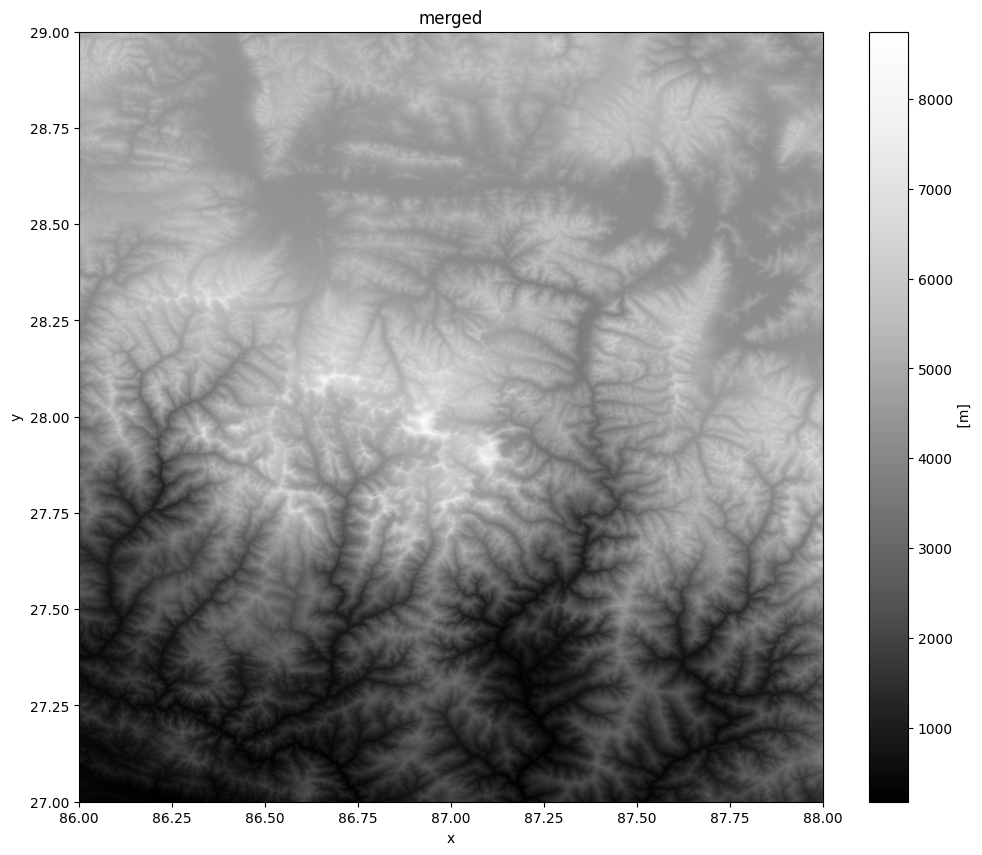

In [19]:
# plot merged raster
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='Greys_r')
ax.set_title('merged')
plt.show()

In [20]:
# save as cloud optimized geotiff
output_file = 'merged.tif'
output_path = os.path.join(output_folder, output_file)
merged.rio.to_raster(output_path, driver='COG')

In [26]:
# find location of max elevation (everest)
max_da = merged.where(merged==merged.max(), drop=True).squeeze()
max_da

<xarray.DataArray ()> Size: 4B
array(8748., dtype=float32)
Coordinates:
    x            float64 8B 86.93
    y            float64 8B 27.99
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

In [27]:
# extract x and y coordinates and max elevation
max_x = max_da.x.values
max_y = max_da.y.values
max_elev = int(max_da.values)
print(max_x, max_y, max_elev)

86.92555555555556 27.988888888888887 8748


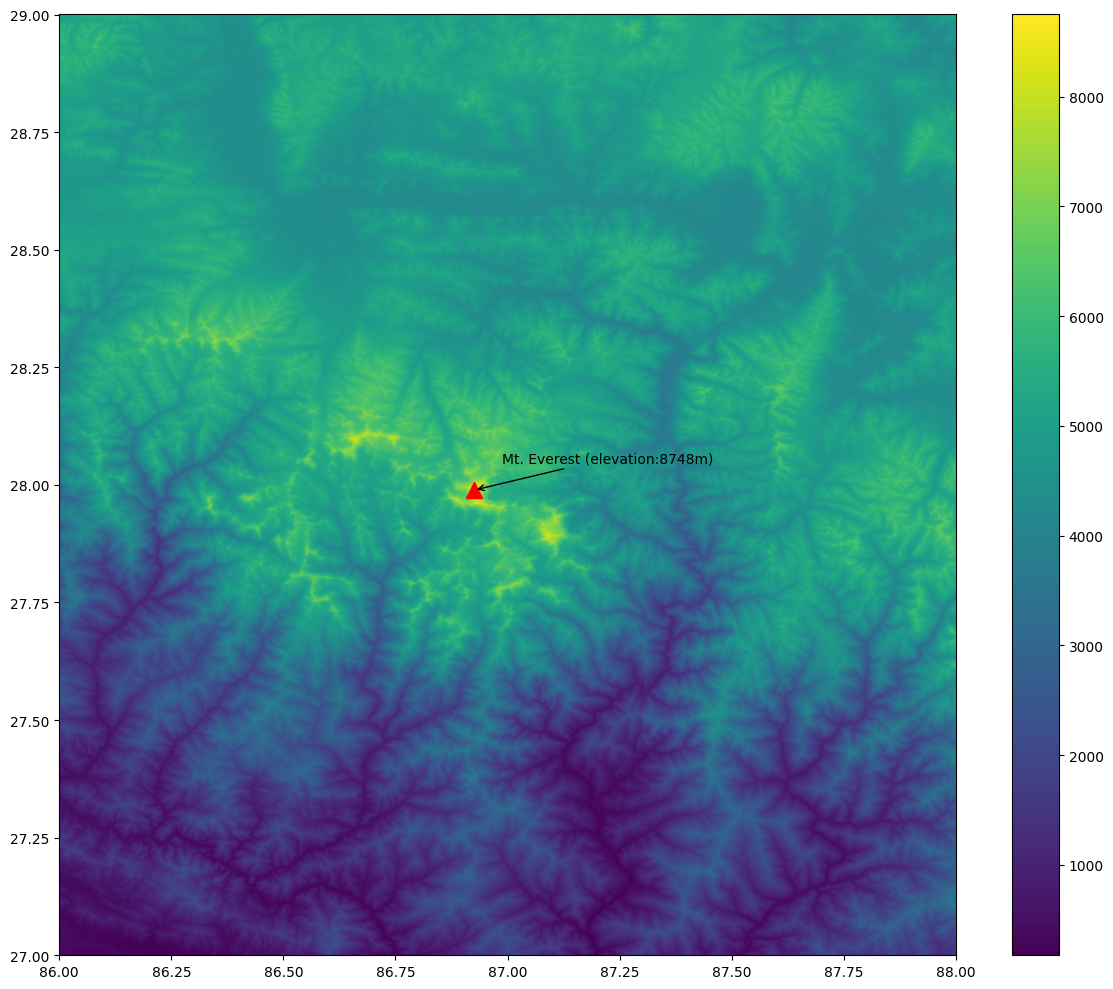

In [28]:
# annotate dem with everest annotated
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='viridis', add_labels=False)
ax.plot(max_x, max_y, '^r', markersize=11)
ax.annotate('Mt. Everest (elevation:{}m)'.format(max_elev),
            xy=(max_x, max_y), xycoords='data',
            xytext=(20, 20), textcoords='offset points',
            arrowprops={'arrowstyle':'->', 'color':'black'}
            )
plt.tight_layout()
plt.show()

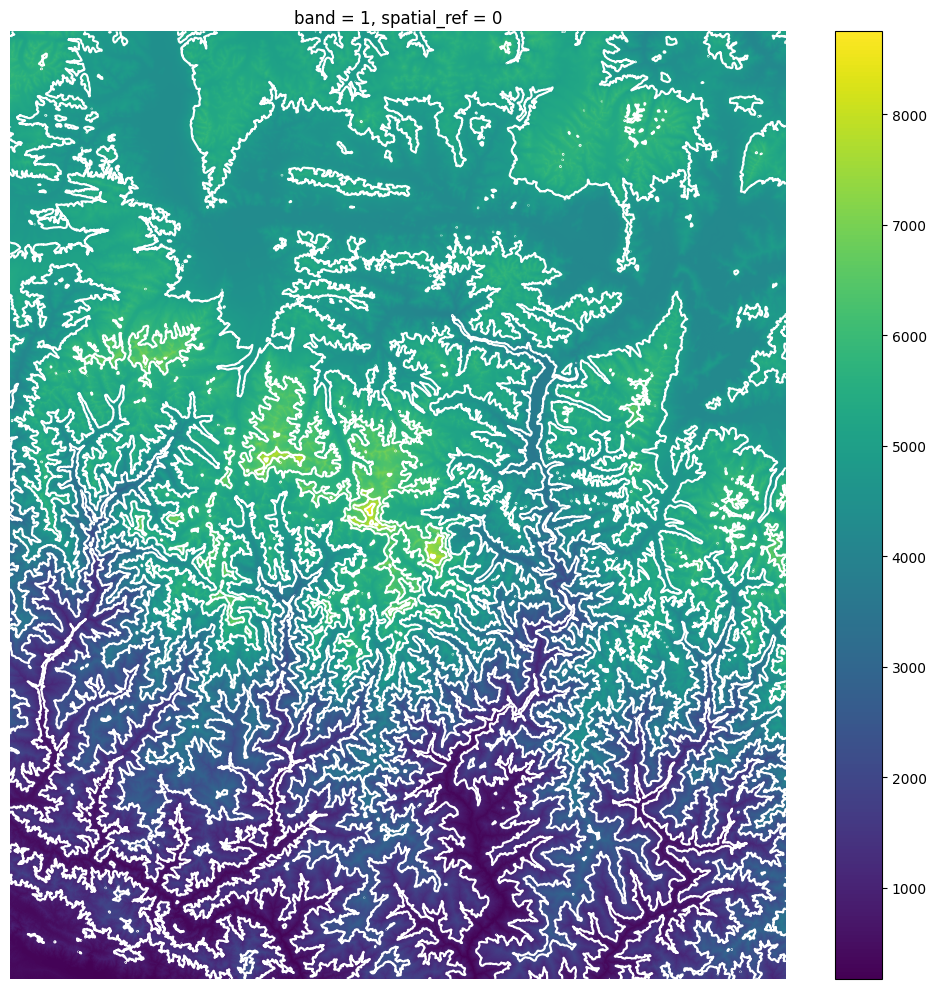

In [38]:
# add contours to the plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
merged.plot.imshow(
    ax=ax,
    cmap='viridis',
    add_labels=False,
    add_colorbar=True)

merged.plot.contour(colors='#FFFFFF', levels=10)

ax.set_axis_off()
plt.tight_layout()
plt.show()